# Scikit-allel
As this is an evolutionary genetics course, one of the tools we want to put into your toolbox is a way of analysing population scale data (i.e. population genetics data). We already covered in the last lecture how biopython can be used to interface with phylogenetics programs for creating trees or doing maximum likelihood estimation. Today we will take a look at `scikit-allel` which enables easy, python based analyses of common population genetic data formats such as `.vcf` files. 

### Installation
As always our first point of business is installing scikit-allel on everyone's machine. Again we will use conda for this, either at the command line or that Anaconda prompt depending on your setup. 

`conda install -c conda-forge scikit-allel`

For people on a Windows machine this may cause issues. If so try to install using `pip` at the Anaconda prompt

`pip install scikit-allel`

Hopefully that will get everything we need installed. If not please let me know.



## Setup

Let's import the libraries we'll be using.

In [3]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt

import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


The data we'll be analyzing came from the [Anophele gambiae 1000 genomes project](https://www.malariagen.net/projects/ag1000g). This project is actually the reason that scikit-allel was developed, but it's useful for much much more.  

We will be using data in Open an HDF5 file containing variant calls from the Ag1000G project phase 1 AR3 data release. Note that this contains raw data, i.e., all putative SNPs are included. As part of the Ag1000G project we have done a detailed analysis of data quality and so this dataset already contains filter annotations to tell you which SNPs we believe are real. However, for the purpose of this tour, I am going to pretend that we have never seen these data before, and so need to perform our own analysis of data quality.


In [8]:
ag= allel.read_vcf("ag1000g.phase1.ar3.pass.biallelic.3R.vcf.28000000-29000000.gz")


In [9]:
allel.vcf_to_hdf5("ag1000g.phase1.ar3.pass.biallelic.3R.vcf.28000000-29000000.gz",
                  "ag1000g.phase1.ar3.pass.biallelic.3R.vcf.28000000-29000000.h5")

In [10]:
callset_fn = 'ag1000g.phase1.ar3.pass.biallelic.3R.vcf.28000000-29000000.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "ag1000g.phase1.ar3.pass.biallelic.3R.vcf.28000000-29000000.h5" (mode r)>

In [16]:
chrom = '3R'
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT'],
                                     index='POS')
variants

<VariantChunkedTable shape=(187188,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,))]
   nbytes=6.4M cbytes=1.7M cratio=3.8
   values=h5py._hl.group.Group>

In [17]:
pos = variants['POS'][:]
pos

array([28000010, 28000013, 28000014, ..., 28999997, 28999998, 28999999],
      dtype=int32)

In [20]:
def plot_windowed_variant_density(pos, start, window_size, title=None):
    
    # setup windows 
    bins = np.arange(start, pos.max(), window_size)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    
    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins)
    y = h / window_size
    
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)
        

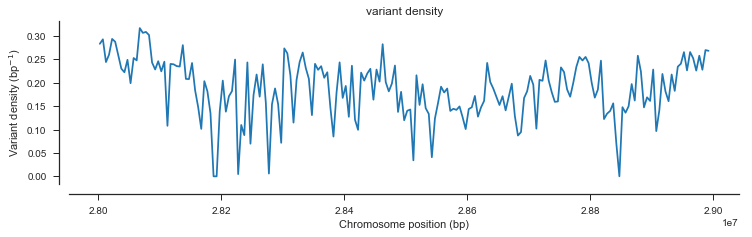

In [26]:
plot_windowed_variant_density(pos, start=28000000, window_size=5000, title='variant density')